In [193]:
import pandas as pd
import numpy as np
import glob
import os
import datetime
import matplotlib.pyplot as plt
import requests
import finvizfinance 
import finvizfinance.screener 
from finvizfinance.quote import finvizfinance
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/draganbogatic/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [194]:
# Input tickers you want to obtain news for
stock_list = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/finviz-etf-stock-screen/resources/stock_list.csv')
stock_list = stock_list.drop(columns=['Unnamed: 0'])
stock_list.head()

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,AMAT,"Applied Materials, Inc.",Technology,Semiconductor Equipment & Materials,USA,1.233400e+11,31.99,133.73,-0.0051,7615112.0
1,BIO,"Bio-Rad Laboratories, Inc.",Healthcare,Medical Devices,USA,1.853000e+10,4.96,626.12,0.0021,138223.0
2,DECK,Deckers Outdoor Corporation,Consumer Cyclical,Footwear & Accessories,USA,9.560000e+09,26.34,341.06,0.0045,147715.0
3,FB,"Facebook, Inc.",Communication Services,Internet Content & Information,USA,8.747300e+11,30.36,306.18,-0.0053,12815056.0
4,GNSS,Genasys Inc.,Technology,Scientific & Technical Instruments,USA,2.408900e+08,23.56,7.21,0.0070,75046.0


In [195]:
tickers = stock_list['Ticker']

In [196]:
# Loop through tickers to print separate csv news files
for ticker in tickers:
    stock = finvizfinance(ticker)
    news = stock.TickerNews()
    news["Ticker"] = ticker
    news.drop_duplicates(keep='first')
    #news.to_csv(f'/Users/draganbogatic/Documents/Fin_Tech/finviz-etf-stock-screen/resources/sentiment/{ticker}.csv')

In [197]:
# Set the directory path where csv files are stored
os.chdir('/Users/draganbogatic/Documents/Fin_Tech/finviz-etf-stock-screen/resources/sentiment')
extension = 'csv'

In [198]:
# Read in all csv files
combined = [i for i in glob.glob('*.{}'.format(extension))]
combined

['GNSS.csv',
 'NVEC.csv',
 'DECK.csv',
 'LORL.csv',
 'PGNY.csv',
 'BIO.csv',
 'AMAT.csv',
 'SEIC.csv',
 'FB.csv',
 'GNTX.csv',
 'VIVO.csv',
 'USNA.csv']

In [199]:
# Concat csv files
combined = pd.concat([pd.read_csv(f) for f in combined])
combined_df = pd.DataFrame(combined)
combined_df = combined_df.drop(['Unnamed: 0'], axis=1)
combined_df = combined_df.reset_index()
combined_df = combined_df.drop(['index'], axis=1)
combined_df
combined_df.to_csv('/Users/draganbogatic/Documents/Fin_Tech/finviz-etf-stock-screen/resources/combined.csv')

In [200]:
# Apply vader sentiment analyzer to news to obtain sentiment scores
vader = SentimentIntensityAnalyzer()

for row in combined_df['Title']:
    scores = combined_df['Title'].apply(vader.polarity_scores).tolist()
    scores = pd.DataFrame(scores)
 
scores

,neg,neu,pos,compound
0,0.0,1.000,0.000,0.0000
1,0.0,1.000,0.000,0.0000
2,0.0,1.000,0.000,0.0000
3,0.0,0.828,0.172,0.3612
4,0.0,0.656,0.344,0.6369
...,...,...,...,...
1152,0.0,0.684,0.316,0.7184
1153,0.0,0.738,0.262,0.4927
1154,0.0,0.686,0.314,0.6705
1155,0.0,0.745,0.255,0.3400


In [201]:
# Concat news and sentiment scores into one dataframe
combined_sentiment = pd.concat([combined_df, scores], join='inner',axis=1)
combined_sentiment[:5]
#combined_sentiment.to_csv('/Users/draganbogatic/Documents/Fin_Tech/finviz-etf-stock-screen/resources/combined_sentiment.csv')

,Date,Title,Link,Ticker,neg,neu,pos,compound
0,2021-04-09 03:38:00,"Introducing Genasys (NASDAQ:GNSS), The Stock T...",https://finance.yahoo.com/news/introducing-gen...,GNSS,0.0,1.000,0.000,0.0000
1,2021-03-23 08:30:00,Genasys Inc. Receives Multi-Year Enterprise So...,https://finance.yahoo.com/news/genasys-inc-rec...,GNSS,0.0,1.000,0.000,0.0000
2,2021-03-11 08:30:00,Genasys Inc. Announces Government of Canada CO...,https://finance.yahoo.com/news/genasys-inc-ann...,GNSS,0.0,1.000,0.000,0.0000
3,2021-03-09 23:35:00,It Looks Like Shareholders Would Probably Appr...,https://finance.yahoo.com/news/looks-sharehold...,GNSS,0.0,0.828,0.172,0.3612
4,2021-03-02 08:30:00,Genasys Inc. to Participate in Stephens Best I...,https://finance.yahoo.com/news/genasys-inc-par...,GNSS,0.0,0.656,0.344,0.6369


In [202]:
# Obtain sentiment by ticker
sentiment_by_ticker = combined_sentiment.groupby(['Ticker']).mean()
sentiment_by_ticker

,neg,neu,pos,compound
Ticker,,,,
AMAT,0.028330,0.850830,0.120850,0.167066
BIO,0.023960,0.882820,0.093230,0.094542
DECK,0.015640,0.864290,0.120080,0.175805
FB,0.068030,0.823270,0.108690,0.057458
GNSS,0.031545,0.883831,0.084623,0.098436
GNTX,0.024330,0.872490,0.103180,0.136322
LORL,0.020330,0.909610,0.070060,0.115847
NVEC,0.033430,0.891570,0.074990,0.074688
PGNY,0.006713,0.919875,0.073413,0.120100


<AxesSubplot:title={'center':'Sentiment Analysis'}, xlabel='Ticker', ylabel='sentiment'>

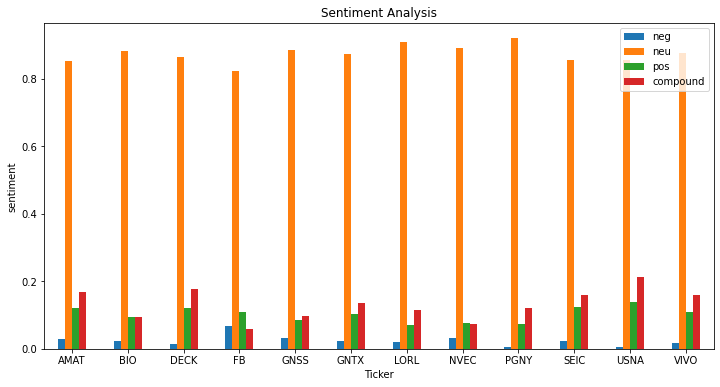

In [203]:
# Plot sentiment
sentiment_by_ticker.plot.bar(figsize=(12,6),title='Sentiment Analysis',ylabel='sentiment', rot=0)